##### Feature scaling has mainly two types i.e standardization and normalization.For now,we will look for standradization.

##### Standardization is also called z-score normalization.The basic geomatrical intituion behind standradisation is to bring all the values in specific range.After performing standardization, mean of the column/data is obtained as zero and standard deviation is obtained as 1. While standardization,the group of data points is brought to origin so as to obtain their mean as zero.If previous standrad deviation was more than 1,then data points are compressed to smaller region so as to get standrad deviation as 1,whereas if it was less than 1 ,then this data points are expanded to obtain standard deviation as 1.

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np

In [25]:
img=pltimg.imread('standardization-formula.jpg')
rotated_img = np.rot90(img,axes=(1,0))

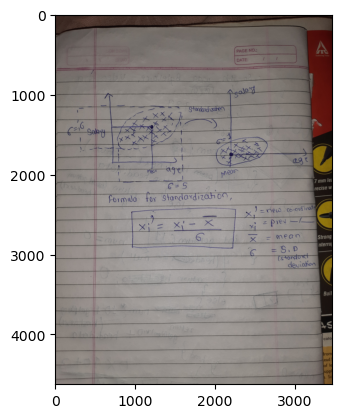

In [26]:
pltimg=plt.imshow(rotated_img)

In [29]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('Social_Network_Ads.csv')

In [31]:
df.head(15)

User ID  Gender  Age  EstimatedSalary  Purchased
0   15624510    Male   19            19000          0
1   15810944    Male   35            20000          0
2   15668575  Female   26            43000          0
3   15603246  Female   27            57000          0
4   15804002    Male   19            76000          0
5   15728773    Male   27            58000          0
6   15598044  Female   27            84000          0
7   15694829  Female   32           150000          1
8   15600575    Male   25            33000          0
9   15727311  Female   35            65000          0
10  15570769  Female   26            80000          0
11  15606274  Female   26            52000          0
12  15746139    Male   20            86000          0
13  15704987    Male   32            18000          0
14  15628972    Male   18            82000          0

In [32]:
df=df.iloc[:,2:]

In [33]:
df.head(15)

Age  EstimatedSalary  Purchased
0    19            19000          0
1    35            20000          0
2    26            43000          0
3    27            57000          0
4    19            76000          0
5    27            58000          0
6    27            84000          0
7    32           150000          1
8    25            33000          0
9    35            65000          0
10   26            80000          0
11   26            52000          0
12   20            86000          0
13   32            18000          0
14   18            82000          0

In [34]:
df.sample(10)

Age  EstimatedSalary  Purchased
294   35            57000          0
304   40            60000          0
345   41            63000          0
149   20            74000          0
194   28            89000          0
399   49            36000          1
303   37            79000          1
375   46            32000          1
166   22            55000          0
61    25            87000          0

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

##### In above command ,df.drop() is used to drop the column which we have specified in the bracket.

### StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# fit the scaler to the train set, it will learn the parameters from the training set.
scaler.fit(X_train)


# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



##### Note that , we have use fit method and transform() seperately,however we can have a func which peform both task single handedly i.e fit_transform(). It basically means ,when we do fit ,our model compute necessary parameters, like mean and standard deviation. transform func apply the scaling transformation to a new dataset (X_test) using the parameters (e.g., mean and standard deviation) learned from the original training data.The model learns from only the training set,whereas we apply transformation to both train and test set. 

##### To obtain or to know the calculated value of mean we can use mean_ attribute.

In [43]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

##### The output of transform() is numpy array.We can convert it into dataframe using Dataframe() for better visual appearance.

In [45]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [46]:
X_train_scaled.head(15)

Age  EstimatedSalary
0  -1.163172        -1.584970
1   2.170181         0.930987
2   0.013305         1.220177
3   0.209385         1.075582
4   0.405465        -0.486047
5  -0.280814        -0.312532
6   0.993704        -0.833075
7   0.993704         1.856396
8   0.013305         1.249096
9  -0.869053         2.261263
10 -1.163172        -1.584970
11  2.170181        -0.804156
12 -1.359252        -1.469294
13  0.405465         2.290182
14  0.797624         0.757472

In [47]:
X_test_scaled.head(15)

Age  EstimatedSalary
0  -0.771013         0.497201
1   0.013305        -0.572804
2  -0.280814         0.150172
3  -0.771013         0.265849
4  -0.280814        -0.572804
5  -1.065133        -1.440375
6  -0.672973        -1.584970
7  -0.182774         2.145587
8  -1.947491        -0.052261
9   0.895664        -0.775237
10 -0.771013        -0.601723
11 -0.967093        -0.428208
12 -0.084734        -0.428208
13  0.111345         0.208011
14 -1.751411         0.468282

##### We can obtain previous standard deviation and mean value using describe func ,by applying to  non scaled dataset and then rounding values using np.round().It takes 2 arguments ,one is the dataset and other is the number upto which we want our decimal places to be.

In [48]:
np.round(X_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

##### After standardization ,we can see the mean become 0 and standard deviation becomes 1.

In [49]:
np.round(X_train_scaled.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

### Effects of Scaling

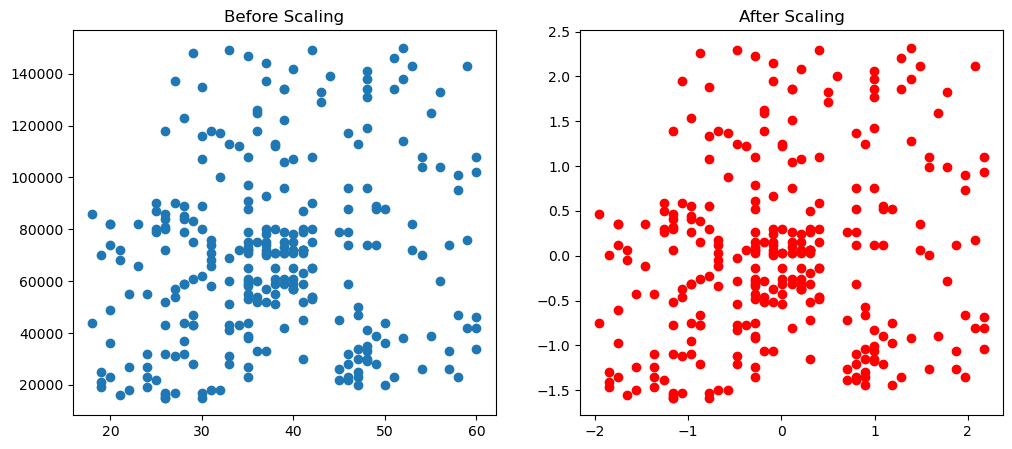

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

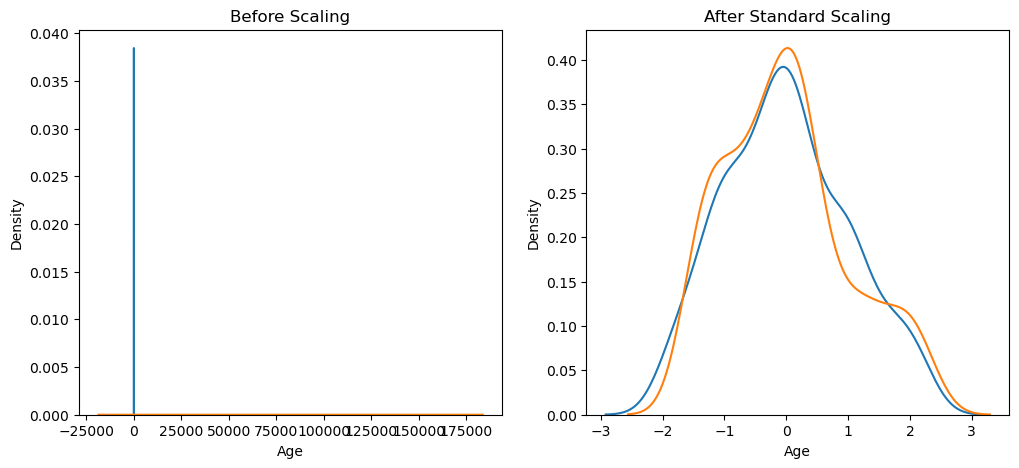

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Comparisons of Distributions

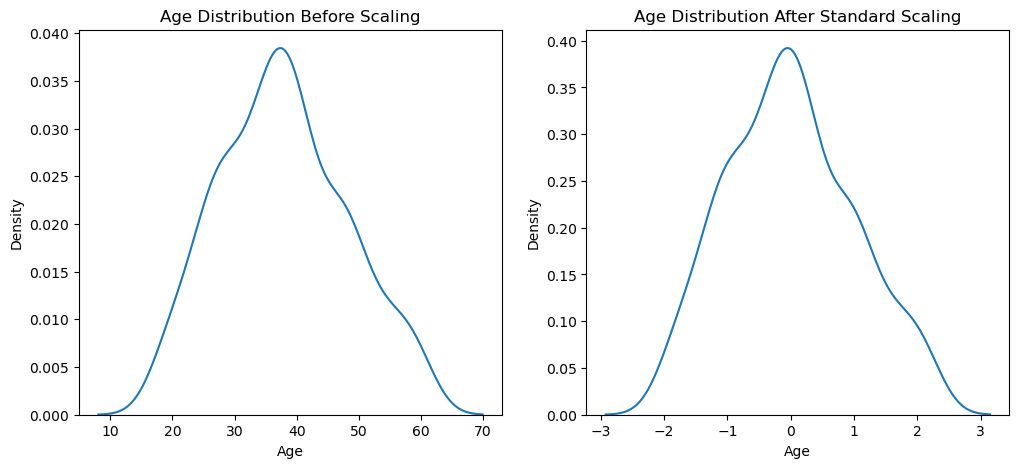

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

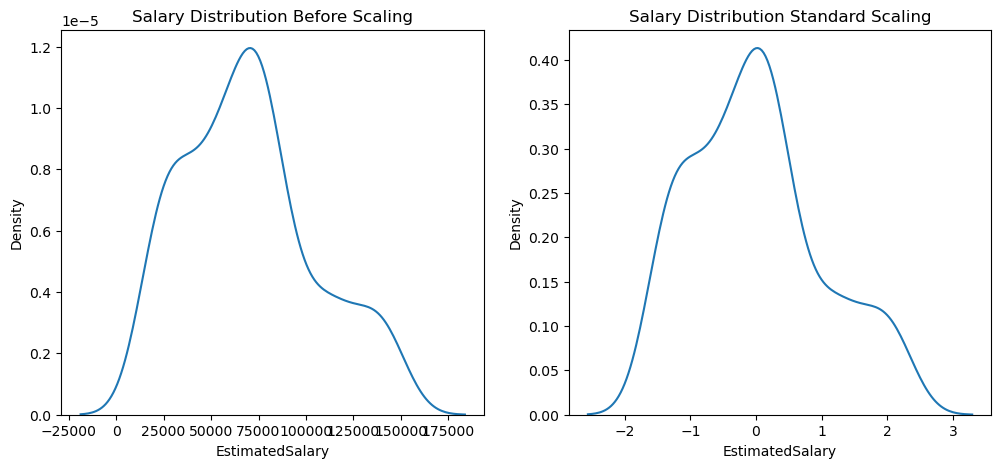

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Why scaling is important?

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [56]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [57]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667
